# Malta Property Bubble Analysis
So I am currently in the process of buying a property. At the moment, prices are sky rocketing. You can find numereous articles stating that we are in a bubble; "yes, no, pro, con, bla, bla ". A quick google search returns varied views: ![fig](https://github.com/zerafachris/playGround/blob/master/published/maltaPropertyBubble/googleSearchPropertyBubble.png)

# Could I quantifies this?
So, the aim here is to try and quantify if we are in bubble, Yes/No, without any of the noise from the media. All of this analysis was done in Excel. The below is just an extract to be able to plot the fig below.

# Data
1. **Annual Average Gross Salary**:
    - Source:  [National Statistics Office (NSO)](https://nso.gov.mt/en/News_Releases/View_by_Unit/Unit_C2/Labour_Market_Statistics/Pages/Labour-Force-Survey.aspx)
    - Type:     Quarterly reports of the gross value
    - Range:    First data point 2001-q4
    - Comments: Come dates have missing data and some are in old Maltese Lira Currency

1. **House Price Index**:
    - Source:   [Central Bank of Malta (CBM)](https://www.centralbankmalta.org/real-economy-indicators)
    - Type:     Property price index (PPI) on a quarterly basis
    - Range:    First data point 2000-q1
    - Comments: All ok.

# Pre-Processing
- **House Price Index (HPI)** was straight forward and not much manpulation was required
- **Annual Average Gross Salary (AAGS)** need a bit more TLC.
    - Maltese Lira values were converted to EUR via $\times 2.32937$
    - Missing dates for 2000-Q1 up to 2001-Q4 were interpolated linearly backwards
- Since the House Price Index is an index value pegged at 2000, the Annual Average Gross Salary was converted to an index pegged at 2000.
- From these two indices, I then derived ```AAGS:HPI```.i.e. the proportion of money needed to buy a property. This can thus be considered as the affordibility.

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.tseries.offsets import MonthEnd

In [149]:
df = pd.read_csv('./combinedData.csv', encoding = "ISO-8859-1")
df.drop(['Annual Average Gross Salary'], axis=1, inplace=True)
df.head()

,Year,Quarter,Annual Average Gross Salary (AAGS) Index,House Price Index (HPI),AAGS : HPI
0,2000,1,100.00%,100.00%,100.00%
1,2000,2,101.20%,93.30%,108.47%
2,2000,3,102.40%,100.24%,102.16%
3,2000,4,103.61%,107.35%,96.52%
4,2001,1,104.81%,102.73%,102.02%


In [150]:
df['Date'] = [datetime(int(str(x)[0:4]), int(str(x)[4:6]), int(str(x)[6:8]))
              + MonthEnd()  for x in df['Year']*10000 +  df['Quarter'].replace({1:3, 2:6, 3:9,4:12})*100 +1  ]
colIndex = ['Annual Average Gross Salary (AAGS) Index','House Price Index (HPI)','AAGS : HPI']
def stripPercentage(col):
    return [float(x.strip('%')) for x in df[col] ]

for col in colIndex:
    df[col] = stripPercentage(col)

In [276]:
def getRangeGradient(minYear, maxYear, col):
#     minYear = 2003
#     maxYear = 2006
#     col = 'Annual Average Gross Salary (AAGS) Index'
    dt = df[col][ (df['Year'] >= minYear) & (df['Year']<= maxYear) ]
    return '[{} : {}]\nSlope {:5.2f}'.format(minYear, maxYear, np.polyfit(dt.index,dt,1)[0])

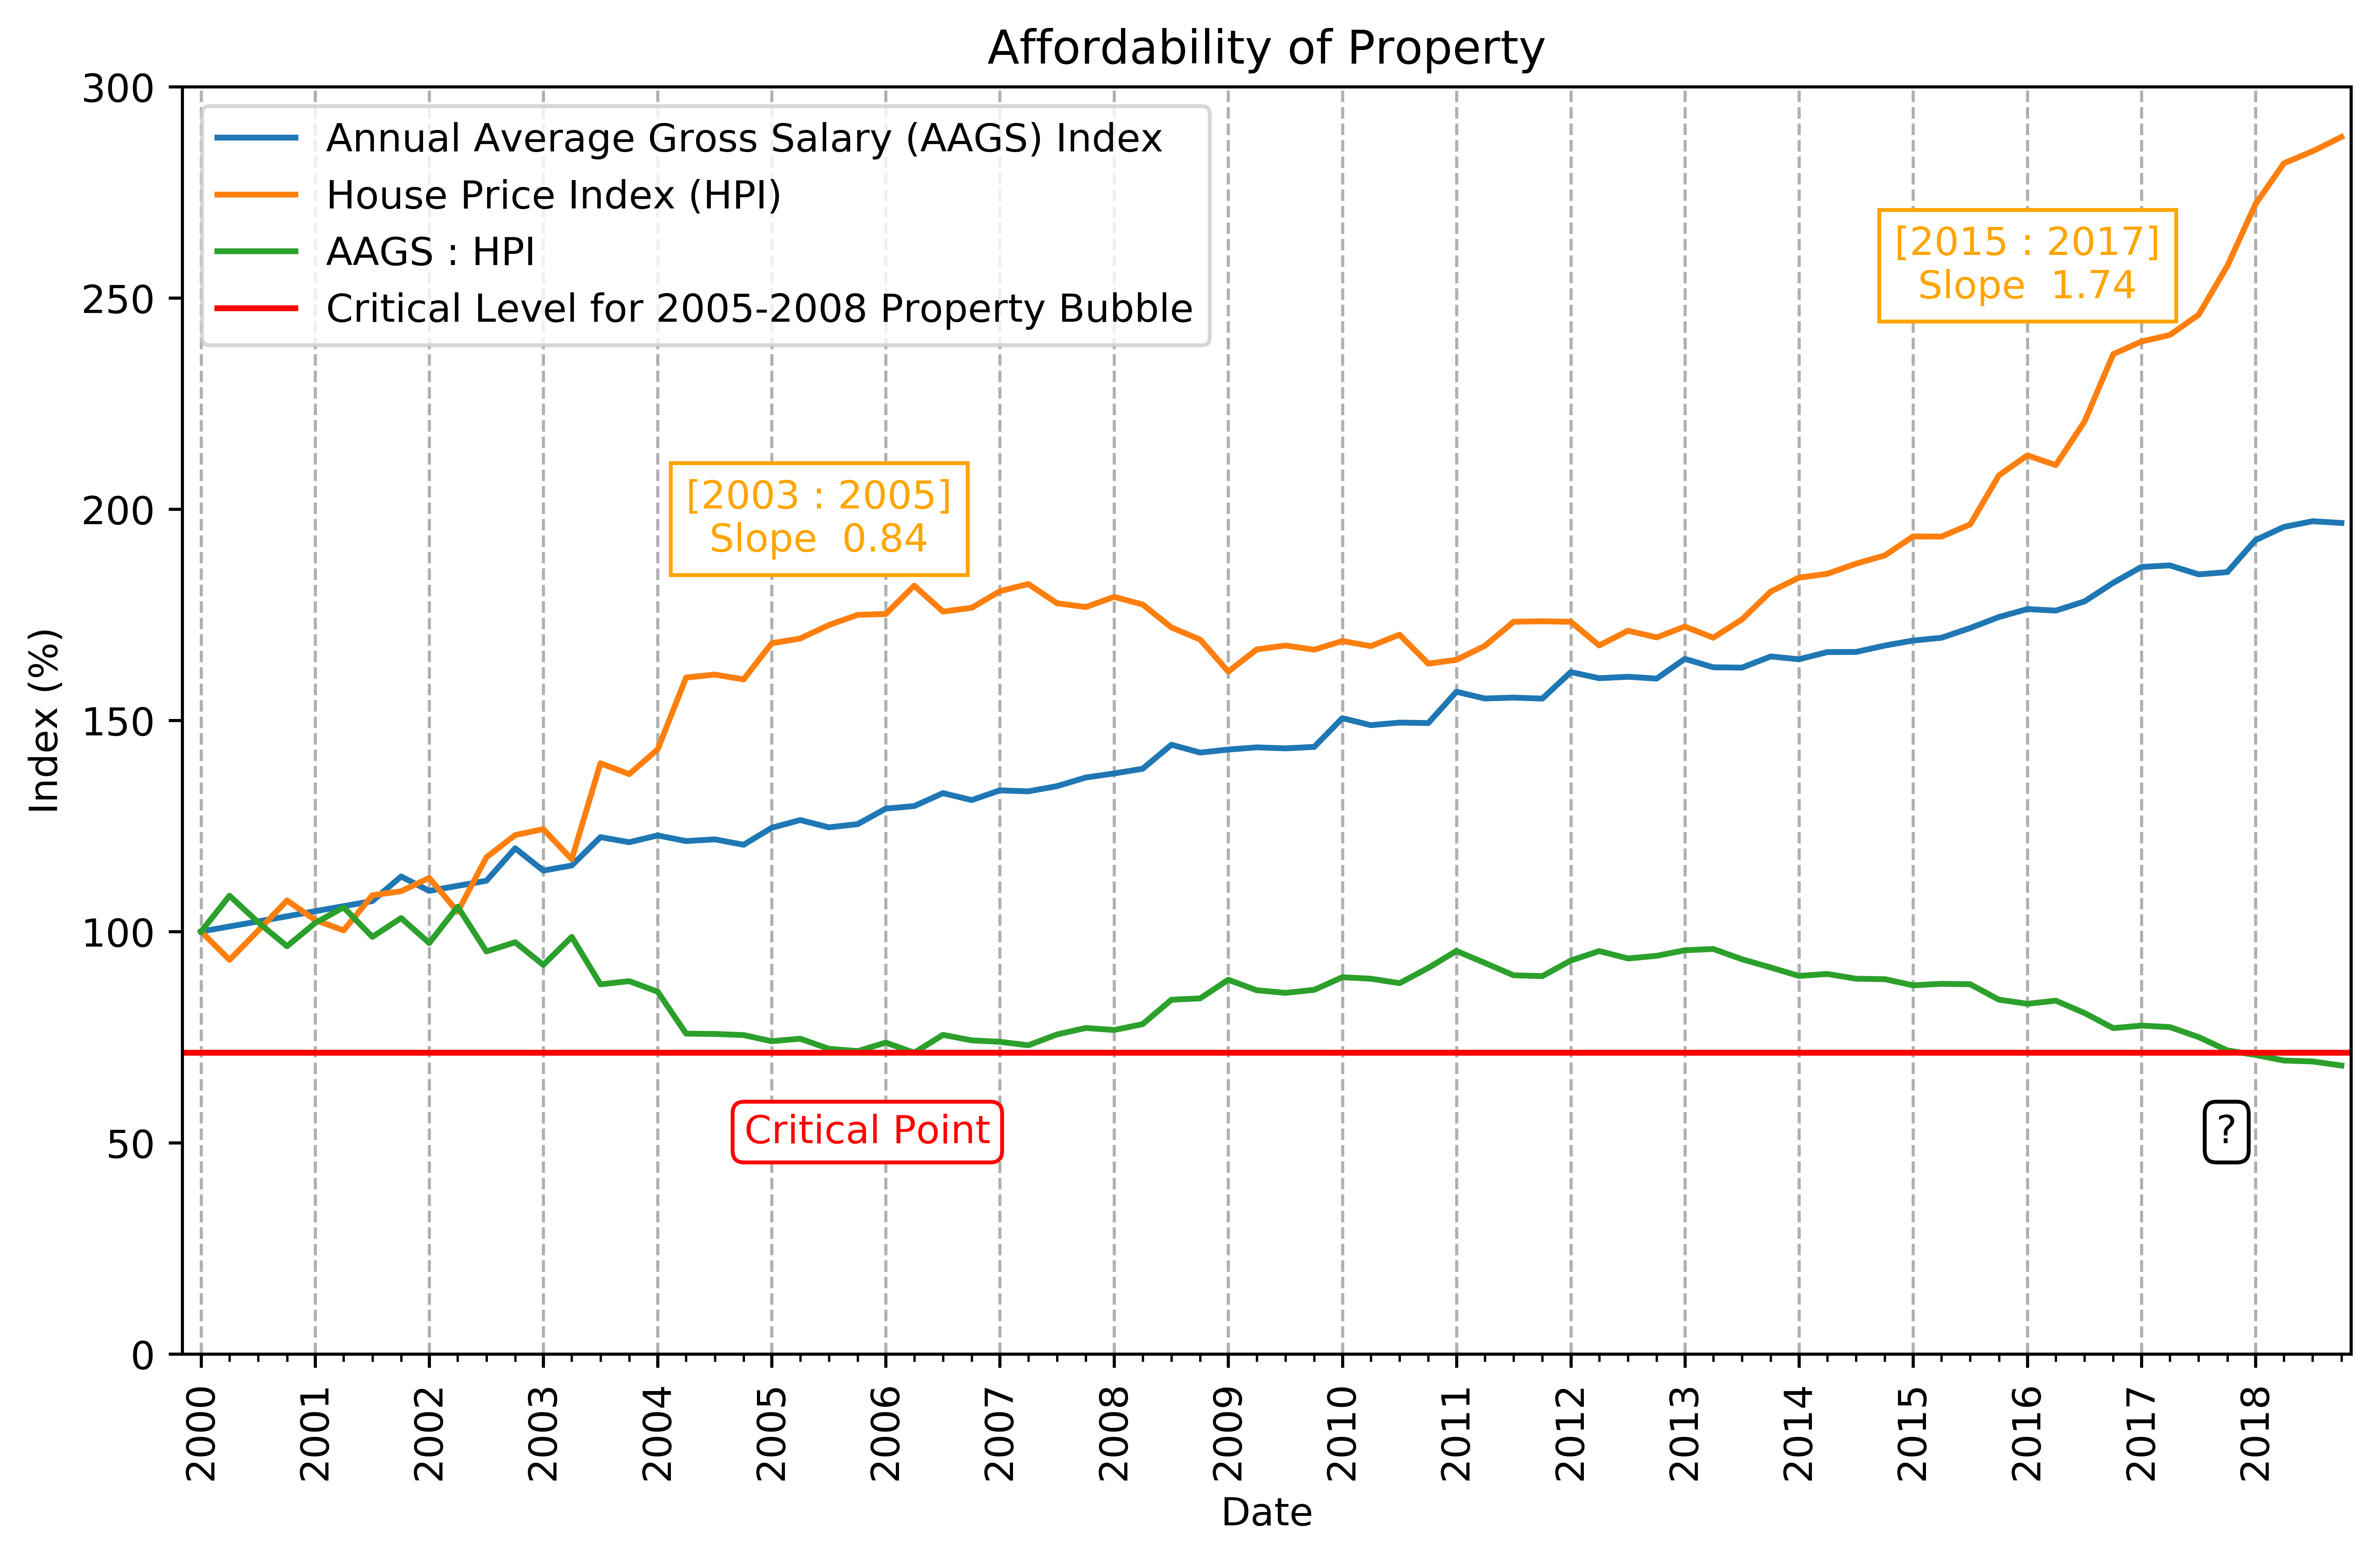

In [277]:
fig, ax = plt.subplots(1,1,figsize=(10,6), dpi=800)
plt.plot(df['Date'], df['Annual Average Gross Salary (AAGS) Index'])
plt.plot(df['Date'], df['House Price Index (HPI)'])
plt.plot(df['Date'], df['AAGS : HPI'])
plt.axhline(y=min(df['AAGS : HPI'][df['Year'] <= 2008]), color='r')
plt.ylim([0,300])
ax.set_xlim(['2000-01-31','2019-01-31'])
ax.set_xticks(df['Date'], minor=True)
ax.set_xticklabels(df['Year'][df['Quarter']==1], rotation=90, ha='center')
ax.set_xticks(df['Date'][df['Quarter']==1] , minor=False)
# ax.xaxis.grid(True, which='minor', linestyle='--')
ax.xaxis.grid(True, which='major', linestyle='--')
plt.text('2006-01-31', 50 , "Critical Point", va="baseline", ha="center", multialignment="left",
         color='red', bbox=dict(facecolor='white', edgecolor='red', boxstyle='round'))
plt.text('2018-01-31', 50 , "?", va="baseline", ha="right", multialignment="left", 
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

plt.text('2004-06-30',190, getRangeGradient(2003,2005,'Annual Average Gross Salary (AAGS) Index'), 
         color='orange', multialignment="center", bbox=dict(facecolor='white', edgecolor='orange'))
plt.text('2015-01-31',250, getRangeGradient(2015,2017,'Annual Average Gross Salary (AAGS) Index'), 
         color='orange', multialignment="center", bbox=dict(facecolor='white', edgecolor='orange'))

plt.title('Affordability of Property')
plt.xlabel('Date')
plt.ylabel('Index (%)')
plt.legend(['Annual Average Gross Salary (AAGS) Index', 'House Price Index (HPI)', 
            'AAGS : HPI', 'Critical Level for 2005-2008 Property Bubble']);
plt.savefig('PropertyAffordability.png', dpi = 400)

# So:
## 1. Are we in a property bubble?
We are definitely **YES**! The rate of increase of HPI is increasing at a much greater rate then AAGS. We are indeed beyond the profitability limit that was observed in the 2005-2008 Property Bubble.

## 2. Who big is the bubble?
The orange number quoted on top of the increasing side of the HPI represents the linear rate of increase. It is evidently clear that the slope of the current bubble is twice as aggressive.

## 3. When will it burst?
:sparkles: **MILLION DOLLAR QUESTION** :sparkles: Well there is currently showing no signs of slowing down. The HPI is still on the increase, although the tip has slighlty dipped down. We have to look at 2019-Q1 results to see what will happen next